In [ ]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_files = font_manager.findSystemFonts(fontpaths='/content/drive/MyDrive/Pal-ette/D2Coding')
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rc('font', family='D2Coding')

In [ ]:
import tensorflow as tf
import os
from scipy.special import softmax
from PIL import Image
import numpy as np


In [ ]:
!unzip -q "/content/drive/MyDrive/개_안구_tr_te_va_squared_all_4class.zip"

In [ ]:
test_data = '/content/개_안구_tr_te_va_squared_all_4class/test'

In [ ]:
model_path = '/content/drive/MyDrive/CV_project/안구질환_모델/Resnet_squared_all_4class_b64_e40.tf'
model = tf.keras.models.load_model(model_path)

In [ ]:
labels= [
    '궤양성각막질환',
    '백내장',
    '안검종양',
    '핵경화'
]


In [ ]:
def inference(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img = np.array(img)

    img = img / 255.
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img, verbose=0)
    return pred

In [ ]:
predictions = {'target':[], 'pred':[], 'prob':[]}
for folder in os.listdir(test_data):
    print(folder)
    for file in os.listdir(os.path.join(test_data, folder)):
        pred = inference(os.path.join(test_data, folder, file))
        predictions['target'].append(folder)
        predictions['pred'].append(labels[pred.argmax()])
        predictions['prob'].append(pred.tolist())
        if len(predictions['target']) % 1000 == 0:
            print(len(predictions['target']), "predictions done")

안검종양
궤양성각막질환
1000 predictions done
2000 predictions done
백내장
3000 predictions done
4000 predictions done
핵경화
5000 predictions done


In [ ]:
import os

base_dir = '/content/개_안구_tr_te_va_squared_all_4class'

for root, dirs, files in os.walk(base_dir):
    if root != base_dir:  # base_dir 자체는 제외
        num_images = sum(1 for file in files if file.endswith('.jpg') or file.endswith('.png'))  # jpg, png 이미지 확인
        print(f"{os.path.basename(root)}: {num_images} images")

val: 0 images
안검종양: 538 images
궤양성각막질환: 1545 images
백내장: 2321 images
핵경화: 1079 images
test: 0 images
안검종양: 540 images
궤양성각막질환: 1547 images
백내장: 2322 images
핵경화: 1081 images
train: 0 images
안검종양: 4307 images
궤양성각막질환: 12371 images
백내장: 18569 images
핵경화: 8638 images


In [ ]:
from collections import Counter

Counter(predictions['target'])

Counter({'안검종양': 540, '궤양성각막질환': 1548, '백내장': 2323, '핵경화': 1081})

In [ ]:
Counter(predictions['pred'])

Counter({'안검종양': 661, '핵경화': 998, '백내장': 2244, '궤양성각막질환': 1589})

In [ ]:
import unicodedata
target = [unicodedata.normalize('NFC', t) for t in predictions['target']]
predictions['target'] = target

In [ ]:
pred = [unicodedata.normalize('NFC', p) for p in predictions['pred']]
predictions['pred'] = pred

In [ ]:
print(target[0], len(target[0]))

안검종양 4


In [ ]:
!rm -rf ~/.cache/matplotlib


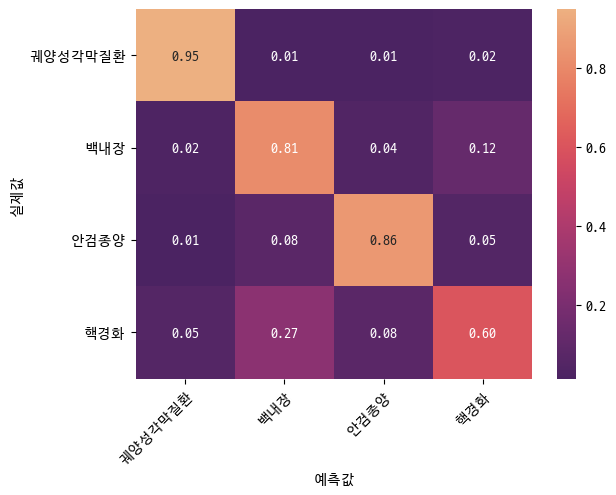

In [ ]:
# confusion matrix 생성 및 시각화
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# confusion matrix 생성 및 시각화
cm = confusion_matrix(predictions['target'], predictions['pred'], normalize='true')
hm = sns.heatmap(cm, annot=True, fmt='.2f', cmap='flare_r')
hm.set_xlabel('예측값', fontsize=10)
hm.set_ylabel('실제값', fontsize=10)
hm.set_xticklabels(labels=labels, fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
hm.set_yticklabels(labels=labels, fontsize=10, rotation=0)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(predictions['target'], predictions['pred'])
print(cr)

              precision    recall  f1-score   support

     궤양성각막질환       0.92      0.95      0.94      1548
         백내장       0.84      0.81      0.83      2323
        안검종양       0.70      0.86      0.77       540
         핵경화       0.65      0.60      0.63      1081

    accuracy                           0.81      5492
   macro avg       0.78      0.81      0.79      5492
weighted avg       0.81      0.81      0.81      5492

